In this tutorial, you will discover the Activity Recognition Using Smartphones dataset for time series classification and how to load and explore the dataset in order to make it ready for predictive modeling.

- How to download and load the dataset into memory.
- How to use line plots, histograms, and box plots to better understand the structure of the motion data.
- How to model the problem, including framing, data preparation, modeling, and evaluation.


## 22.1 Tutorial Overview
This tutorial is divided into 10 parts; they are:
1. Activity Recognition Using Smartphones Dataset 
2. Download the Dataset
3. Load the Dataset
4. Balance of Activity Classes
5. Plot Time Series Per Subject
6. Plot Distribution Per Subject
7. Plot Distribution Per Activity
8. Plot Distribution of Activity Duration 
9. Approach to Modeling

## 22.2 Activity Recognition Using Smartphones Dataset

A standard human activity recognition dataset is the Activity Recognition Using Smartphones dataset made available in 2012.

The data was collected from 30 subjects aged between 19 and 48 years old performing one of 6 standard activities while wearing a waist-mounted smartphone that recorded the movement data. 

The six activities performed were as follows:
1. Walking
2. Walking Upstairs
3. Walking Downstairs 
4. Sitting
5. Standing
6. Laying

The movement data recorded was the x, y, and z accelerometer data (linear acceleration) and gyroscopic data (angular velocity) from the smartphone, specifically a Samsung Galaxy S II. Observations were recorded at 50 Hz (i.e. 50 data points per second). Each subject performed the sequence of activities twice, once with the device on their left-hand-side and once with the device on their right-hand side.

The raw data is not available. Instead, a pre-processed version of the dataset was made
available. The pre-processing steps included:
- Pre-processing accelerometer and gyroscope using noise filters.
- Splitting data into fixed windows of 2.56 seconds (128 data points) with 50% overlap.
- Splitting of accelerometer data into gravitational (total) and body motion components.

A number of time and frequency features commonly used in the field of human activity recognition were extracted from each window. The result was a 561 element vector of features. The dataset was split into __train (70%) and test (30%)__ sets based on data for subjects, e.g. 21 subjects for train and nine for test.

Early experiment results with a support vector machine intended for use on a smartphone (e.g. fixed-point arithmetic) resulted in a predictive accuracy of 89% on the test dataset, achieving similar results as an unmodified SVM implementation.

## 22.3 Download the Dataset

The data is provided as a single zip file that is about 58 megabytes in size. A direct for downloading the dataset is provided below: https://raw.githubusercontent.com/jbrownlee/Datasets/master/HAR_Smartphones.zip

- There are train and test folders containing the split portions of the data for modeling (e.g. 70%/30%).
- There is a README.txt file that contains a detailed technical description of the dataset and the contents of the unzipped files.
- There is a features.txt file that contains a technical description of the engineered features.

Inspecting the train folder shows a few important elements:
- An Inertial Signals folder that contains the preprocessed data.
- The X train.txt file that contains the engineered features intended for fitting a model.
- The y train.txt that contains the class labels for each observation (1-6).
- The subject train.txt file that contains a mapping of each line in the data files with their subject identifier (1-30).


The number of lines in each file match, indicating that one row is one record in each data file. The Inertial Signals directory contains 9 files.
- Gravitational acceleration data files for x, y and z axes: total acc x train.txt, total acc y train.txt, total acc z train.txt.
- Body acceleration data files for x, y and z axes: body acc x train.txt, body acc y train.txt, body acc z train.txt.
- Body gyroscope data files for x, y and z axes: body gyro x train.txt, body gyro y train.txt, body gyro z train.txt.

We will focus our attention on the data in the Inertial Signals as this is most interesting in developing machine learning models that can learn a suitable representation, instead of using the domain-specific feature engineering.

## 22.4 Load the Dataset


We can use the read_csv() Pandas function to load a single data file and specify that the file has no header and to separate columns using white space.

In [1]:
# load one file from the har dataset
from pandas import read_csv

# load a single file as a numpy array
def load_file(filepath):
	dataframe = read_csv(filepath, header=None, delim_whitespace=True)
	return dataframe.values

data = load_file('HARDataset/train/Inertial Signals/total_acc_y_train.txt')
print(data.shape)

(7352, 128)


Ideally, when working with multivariate time series data, it is useful to have the data structured in the format: [samples, timesteps, features]. This is helpful for analysis and is the expectation of deep learning models such as convolutional neural networks and recurrent neural networks. 

Once we have loaded each file as a NumPy array, we can combine or stack all three arrays together. We can use the dstack() NumPy function to ensure that each array is stacked in such a way that the features are separated in the third dimension, as we would prefer. 

In [4]:
import numpy as np
a = np.array([[1],[2],[3]])
b = np.array([[2],[3],[4]])

In [5]:
c = []
c.append(a)
c.append(b)

In [6]:
c

[array([[1],
        [2],
        [3]]), array([[2],
        [3],
        [4]])]

In [7]:
c = np.dstack(c)

In [8]:
c

array([[[1, 2]],

       [[2, 3]],

       [[3, 4]]])

In [9]:
# load group of files from the har dataset
from numpy import dstack
from pandas import read_csv

# load a single file as a numpy array
def load_file(filepath):
	dataframe = read_csv(filepath, header=None, delim_whitespace=True)
	return dataframe.values

# load a list of files, such as x, y, z data for a given variable
def load_group(filenames, prefix=''):
	loaded = list()
	for name in filenames:
		data = load_file(prefix + name)
		loaded.append(data)
	# stack group so that features are the 3rd dimension
	loaded = dstack(loaded)
	return loaded

# load the total acc data
filenames = ['total_acc_x_train.txt', 'total_acc_y_train.txt', 'total_acc_z_train.txt']
total_acc = load_group(filenames, prefix='HARDataset/train/Inertial Signals/')
print(total_acc.shape)

(7352, 128, 3)


Finally, we can use the two functions developed so far to load all data for the train and the test dataset. Given the parallel structure in the train and tes

In [12]:
# load all train and test data from the har dataset 
from numpy import dstack 
from pandas import read_csv 

# load a single file as a numpy array 
def load_file(filepath):
    dataframe = read_csv(filepath, header=None, delim_whitespace=True)
    return dataframe.values 

# load a list of files, such as x, y, z data for a given variable 
def load_group(filenames, prefix=''):
    loaded = []
    for name in filenames:
        data = load_file(prefix + name)
        loaded.append(data)
    # stack group so that features are the 3rd dimensions 
    loaded = dstack(loaded)
    return loaded 

# load a dataset group, such as train or test 
def load_dataset(group, prefix=''):
    filepath = prefix + group + '/Inertial Signals/'
    # load all 9 files as a single array 
    filenames = []
    # total acceleration 
    filenames += ['total_acc_x_'+group+'.txt', 'total_acc_y_'+group+'.txt', 'total_acc_z_'+group+'.txt']
    # body acceleration
    filenames += ['body_acc_x_'+group+'.txt', 'body_acc_y_'+group+'.txt', 'body_acc_z_'+group+'.txt']
    # body gyroscope
    filenames += ['body_gyro_x_'+group+'.txt', 'body_gyro_y_'+group+'.txt', 'body_gyro_z_'+group+'.txt']
    
    # load input data 
    X = load_group(filenames, filepath)
    # load class output 
    y = load_file(prefix + group + '/y_' + group + '.txt')
    return X, y 

# load all train
trainX, trainy = load_dataset('train', 'HARDataset/') 
print(trainX.shape, trainy.shape)
# load all test
testX, testy = load_dataset('test', 'HARDataset/') 
print(testX.shape, testy.shape)

(7352, 128, 9) (7352, 1)
(2947, 128, 9) (2947, 1)


## 22.5 Balance of Activity Classes

Confirming this expectation will both check that the data is indeed balanced, making it easier to model, and confirm that we are correctly loading and interpreting the dataset. We can develop a function that summarizes the breakdown of the output variables, e.g. the y variable. The function class breakdown() below implements this behavior, first wrapping the provided NumPy array in a DataFrame, grouping the rows by the class value, and calculating the size of each group (number of rows).

In [13]:
# summarize class balance from the har dataset
from numpy import vstack
from pandas import read_csv
from pandas import DataFrame

# load a single file as a numpy array
def load_file(filepath):
	dataframe = read_csv(filepath, header=None, delim_whitespace=True)
	return dataframe.values

# summarize the balance of classes in an output variable column
def class_breakdown(data):
	# convert the numpy array into a dataframe
	df = DataFrame(data)
	# group data by the class value and calculate the number of rows
	counts = df.groupby(0).size()
	# retrieve raw rows
	counts = counts.values
	# summarize
	for i in range(len(counts)):
		percent = counts[i] / len(df) * 100
		print('Class=%d, total=%d, percentage=%.3f' % (i+1, counts[i], percent))

# load train file
trainy = load_file('HARDataset/train/y_train.txt')
# summarize class breakdown
print('Train Dataset')
class_breakdown(trainy)

# load test file
testy = load_file('HARDataset/test/y_test.txt')
# summarize class breakdown
print('Test Dataset')
class_breakdown(testy)

# summarize combined class breakdown
print('Both')
combined = vstack((trainy, testy))
class_breakdown(combined)

Train Dataset
Class=1, total=1226, percentage=16.676
Class=2, total=1073, percentage=14.595
Class=3, total=986, percentage=13.411
Class=4, total=1286, percentage=17.492
Class=5, total=1374, percentage=18.689
Class=6, total=1407, percentage=19.138
Test Dataset
Class=1, total=496, percentage=16.831
Class=2, total=471, percentage=15.982
Class=3, total=420, percentage=14.252
Class=4, total=491, percentage=16.661
Class=5, total=532, percentage=18.052
Class=6, total=537, percentage=18.222
Both
Class=1, total=1722, percentage=16.720
Class=2, total=1544, percentage=14.992
Class=3, total=1406, percentage=13.652
Class=4, total=1777, percentage=17.254
Class=5, total=1906, percentage=18.507
Class=6, total=1944, percentage=18.876


## 22.6 Plot Time Series Per Subject


Finally, we have enough to plot the data. We can plot each of the nine variables for the subject in turn and a final plot for the activity level. Each series will have the same number of time steps (length of x-axis), therefore, it may be useful to create a subplot for each variable and align all plots vertically so we can compare the movement on each variable. 

[ 1  3  5  6  7  8 11 14 15 16 17 19 21 22 23 25 26 27 28 29 30]
(347, 128, 9) (347, 1)


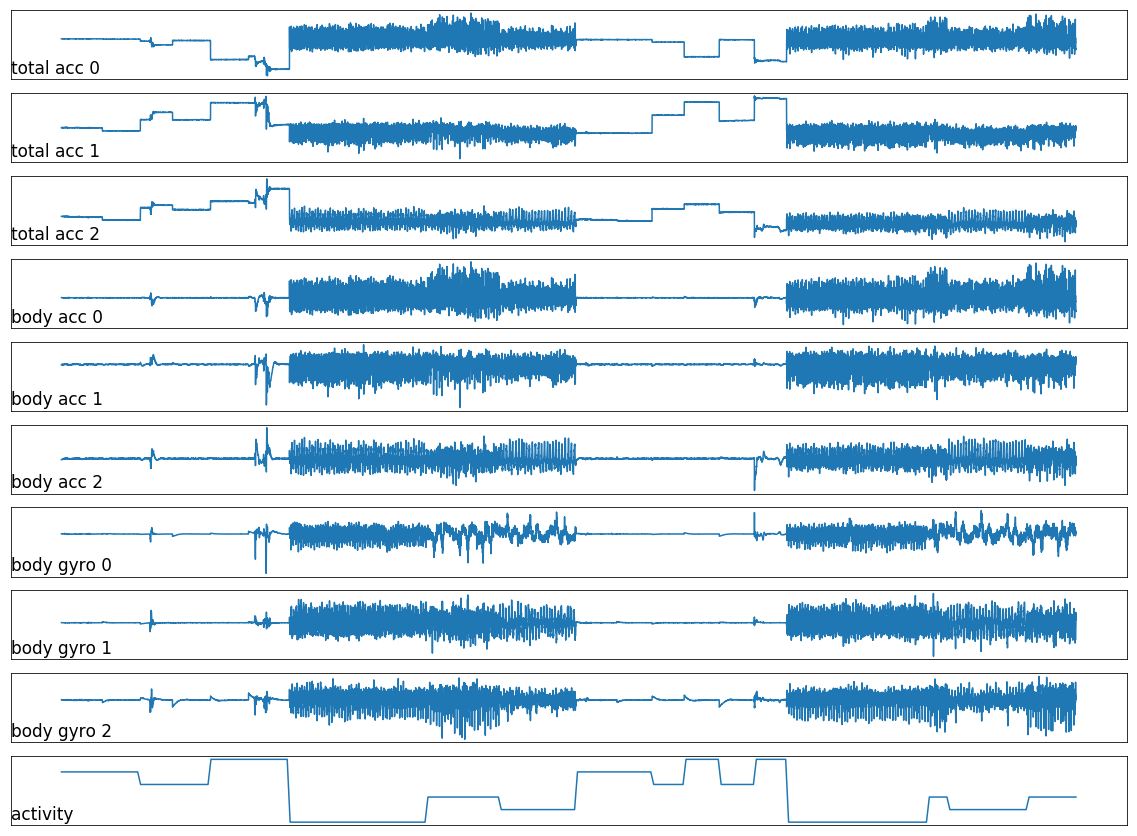

In [18]:
# plot all vars for one subject in the har dataset
from numpy import dstack
from numpy import unique
from pandas import read_csv
from matplotlib import pyplot
%matplotlib inline
pyplot.rcParams['figure.figsize'] = (20, 15)

# load a single file as a numpy array
def load_file(filepath):
	dataframe = read_csv(filepath, header=None, delim_whitespace=True)
	return dataframe.values

# load a list of files, such as x, y, z data for a given variable
def load_group(filenames, prefix=''):
	loaded = list()
	for name in filenames:
		data = load_file(prefix + name)
		loaded.append(data)
	# stack group so that features are the 3rd dimension
	loaded = dstack(loaded)
	return loaded

# load a dataset group, such as train or test
def load_dataset(group, prefix=''):
	filepath = prefix + group + '/Inertial Signals/'
	# load all 9 files as a single array
	filenames = list()
	# total acceleration
	filenames += ['total_acc_x_'+group+'.txt', 'total_acc_y_'+group+'.txt', 'total_acc_z_'+group+'.txt']
	# body acceleration
	filenames += ['body_acc_x_'+group+'.txt', 'body_acc_y_'+group+'.txt', 'body_acc_z_'+group+'.txt']
	# body gyroscope
	filenames += ['body_gyro_x_'+group+'.txt', 'body_gyro_y_'+group+'.txt', 'body_gyro_z_'+group+'.txt']
	# load input data
	X = load_group(filenames, filepath)
	# load class output
	y = load_file(prefix + group + '/y_'+group+'.txt')
	return X, y

# get all data for one subject
def data_for_subject(X, y, sub_map, sub_id):
	# get row indexes for the subject id
	ix = [i for i in range(len(sub_map)) if sub_map[i]==sub_id]
	# return the selected samples
	return X[ix, :, :], y[ix]

# convert a series of windows to a 1D list
def to_series(windows):
	series = list()
	for window in windows:
		# remove the overlap from the window
		half = int(len(window) / 2) - 1
		for value in window[-half:]:
			series.append(value)
	return series

# plot the data for one subject
def plot_subject(X, y):
	pyplot.figure()
	# determine the total number of plots
	n, off = X.shape[2] + 1, 0
	# plot total acc
	for i in range(3):
		pyplot.subplot(n, 1, off+1)
		pyplot.plot(to_series(X[:, :, off]))
		pyplot.title('total acc '+str(i), y=0, loc='left', size=17)
		# turn off ticks to remove clutter
		pyplot.yticks([])
		pyplot.xticks([])
		off += 1
	# plot body acc
	for i in range(3):
		pyplot.subplot(n, 1, off+1)
		pyplot.plot(to_series(X[:, :, off]))
		pyplot.title('body acc '+str(i), y=0, loc='left', size=17)
		# turn off ticks to remove clutter
		pyplot.yticks([])
		pyplot.xticks([])
		off += 1
	# plot body gyro
	for i in range(3):
		pyplot.subplot(n, 1, off+1)
		pyplot.plot(to_series(X[:, :, off]))
		pyplot.title('body gyro '+str(i), y=0, loc='left', size=17)
		# turn off ticks to remove clutter
		pyplot.yticks([])
		pyplot.xticks([])
		off += 1
	# plot activities
	pyplot.subplot(n, 1, n)
	pyplot.plot(y)
	pyplot.title('activity', y=0, loc='left', size=17)
	# turn off ticks to remove clutter
	pyplot.yticks([])
	pyplot.xticks([])
	pyplot.show()

# load data
trainX, trainy = load_dataset('train', 'HARDataset/')
# load mapping of rows to subjects
sub_map = load_file('HARDataset/train/subject_train.txt')
train_subjects = unique(sub_map)
print(train_subjects)
# get the data for one subject
sub_id = train_subjects[0]
subX, suby = data_for_subject(trainX, trainy, sub_map, sub_id)
print(subX.shape, suby.shape)
# plot data for subject
plot_subject(subX, suby)

The activity plot, y axis presents the activity types. 

In the plot, we can see periods of large movement corresponding with activities 1, 2, and 3: the walking activities. We can also see much less activity (i.e. a relatively straight line) for higher numbered activities, 4, 5, and 6 (sitting, standing, and laying). This is good confirmation that we have correctly loaded interpreted the raw dataset. We can see that this subject has performed the same general sequence of activities twice, and some activities are performed more than two times. This suggests that for a given subject, we should not make assumptions about what activities may have been performed or their order.

(341, 128, 9) (341, 1)


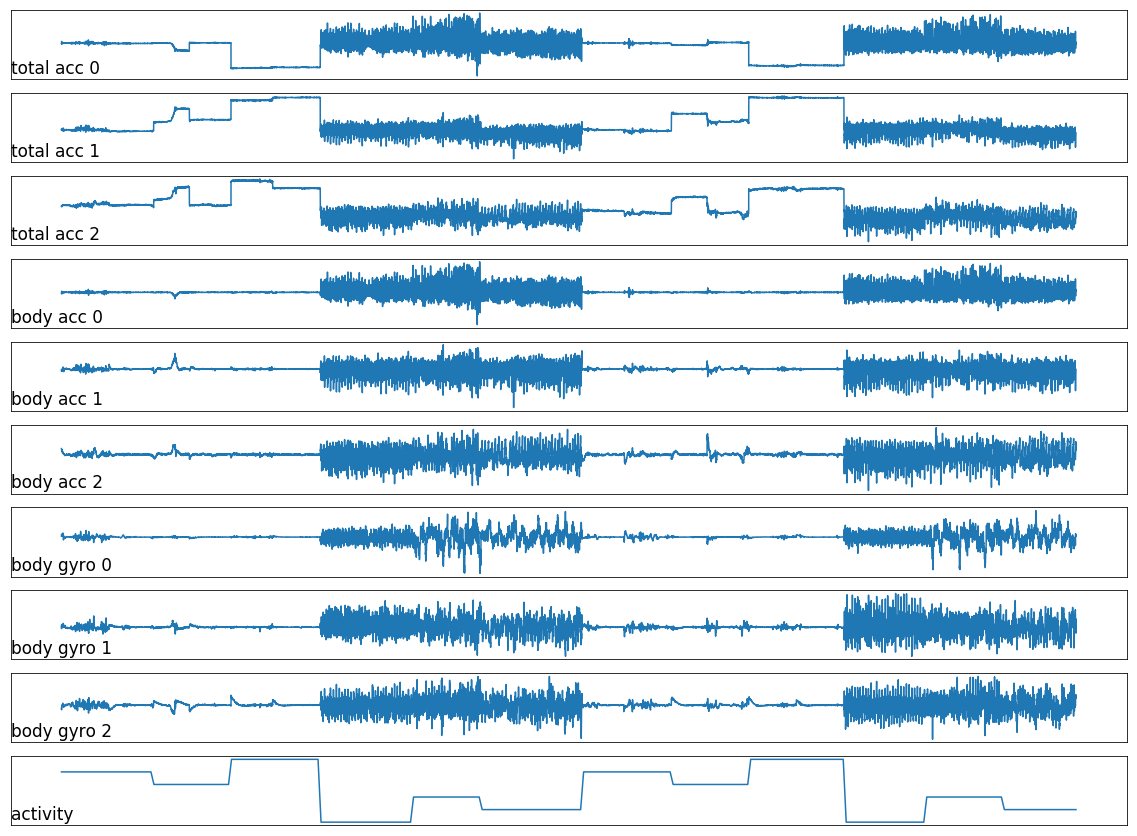

In [23]:
# get the data for second subject
sub_id = train_subjects[1]
subX, suby = data_for_subject(trainX, trainy, sub_map, sub_id)
print(subX.shape, suby.shape)
# plot data for subject
plot_subject(subX, suby)

choose the identifier of the second subject in the training dataset.

The plot for the second subject shows similar behavior with no surprises. The double sequence of activities does appear more regular than the first subject.

## 22.7 Plot Distribution Per Subject

We are interested in using the movement data from some subjects to predict activities from the movement of other subjects. This suggests that there must be regularity in the movement data across subjects. We know that the data has been scaled between -1 and 1, presumably per subject, suggesting that the amplitude of the detected movements will be similar. We would also expect that the distribution of movement data would be similar across subjects, given that they performed the same actions.

We can check for this by plotting and comparing the histograms of the movement data across subjects.

The plot subject histograms() function below implements this behavior. The function takes the loaded dataset and mapping of rows to subjects as well as a maximum number of subjects to plot, fixed at 10 by default.

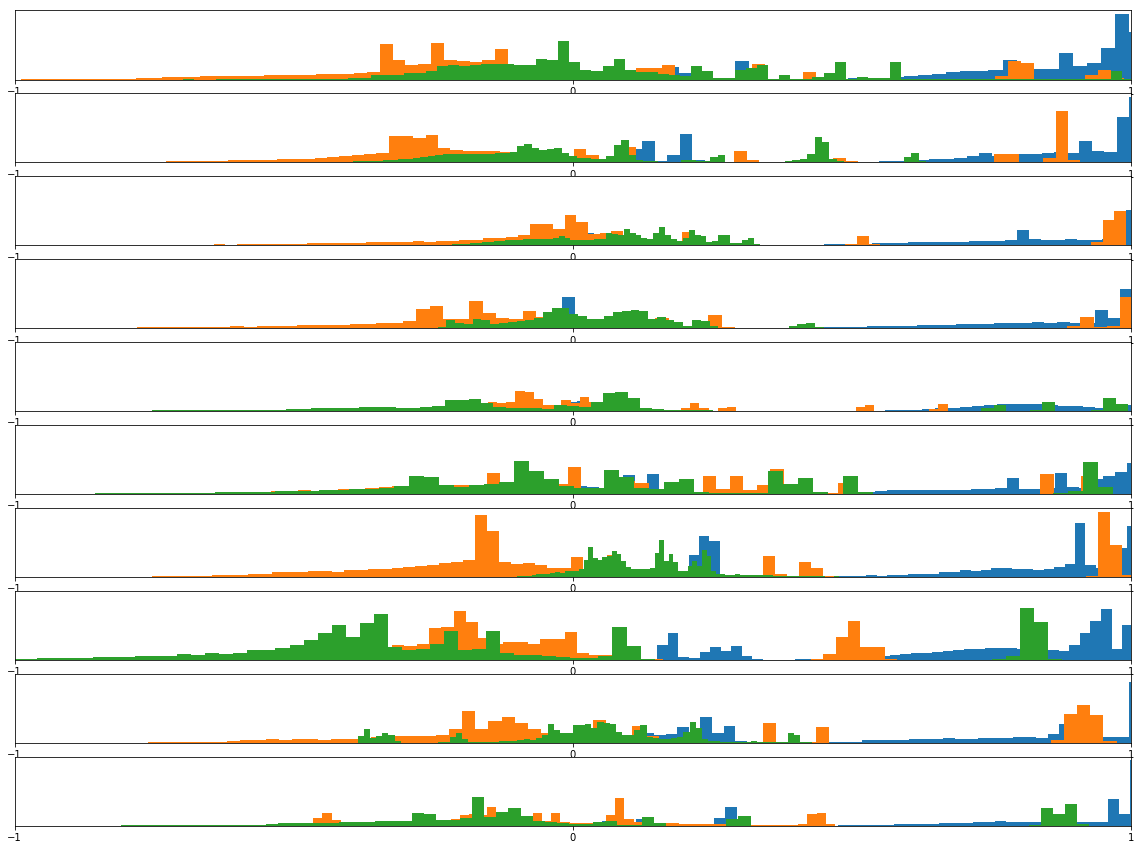

In [25]:
# plot histograms for multiple subjects from the har dataset
from numpy import unique
from numpy import dstack
from pandas import read_csv
from matplotlib import pyplot

# load a single file as a numpy array
def load_file(filepath):
	dataframe = read_csv(filepath, header=None, delim_whitespace=True)
	return dataframe.values

# load a list of files, such as x, y, z data for a given variable
def load_group(filenames, prefix=''):
	loaded = list()
	for name in filenames:
		data = load_file(prefix + name)
		loaded.append(data)
	# stack group so that features are the 3rd dimension
	loaded = dstack(loaded)
	return loaded

# load a dataset group, such as train or test
def load_dataset(group, prefix=''):
	filepath = prefix + group + '/Inertial Signals/'
	# load all 9 files as a single array
	filenames = list()
	# total acceleration
	filenames += ['total_acc_x_'+group+'.txt', 'total_acc_y_'+group+'.txt', 'total_acc_z_'+group+'.txt']
	# body acceleration
	filenames += ['body_acc_x_'+group+'.txt', 'body_acc_y_'+group+'.txt', 'body_acc_z_'+group+'.txt']
	# body gyroscope
	filenames += ['body_gyro_x_'+group+'.txt', 'body_gyro_y_'+group+'.txt', 'body_gyro_z_'+group+'.txt']
	# load input data
	X = load_group(filenames, filepath)
	# load class output
	y = load_file(prefix + group + '/y_'+group+'.txt')
	return X, y

# get all data for one subject
def data_for_subject(X, y, sub_map, sub_id):
	# get row indexes for the subject id
	ix = [i for i in range(len(sub_map)) if sub_map[i]==sub_id]
	# return the selected samples
	return X[ix, :, :], y[ix]

# convert a series of windows to a 1D list
def to_series(windows):
	series = list()
	for window in windows:
		# remove the overlap from the window
		half = int(len(window) / 2) - 1
		for value in window[-half:]:
			series.append(value)
	return series

# plot histograms for multiple subjects 
def plot_subject_histograms(X, y, sub_map, offset, n=10):
    pyplot.figure()
    # get unique subjects
    subject_ids = unique(sub_map[:,0])
    # enumerate subjects
    for k in range(n):
        sub_id = subject_ids[k]
        # get data for one subject
        subX, _ = data_for_subject(X, y, sub_map, sub_id)
        # total acc 
        for i in range(3):
            ax = pyplot.subplot(n, 1, k+1)
            ax.set_xlim(-1, 1)
            ax.hist(to_series(subX[:,:,offset+i]), bins=100)
            pyplot.yticks([])
            pyplot.xticks([-1, 0, 1])
    pyplot.show()
    
 # load training dataset
X, y = load_dataset('train', 'HARDataset/')
# load mapping of rows to subjects
sub_map = load_file('HARDataset/train/subject_train.txt') 
# plot total acceleration histograms for subjects 
plot_subject_histograms(X, y, sub_map, 0)

Running the example creates three figures, each with 10 plots with histograms for the three axis. Each of the three axes on a given plot have a different color, specifically x, y, and z are blue, orange, and green respectively. The first figure summarizes the total acceleration. We can see that the distribution for a given axis does appear Gaussian with large separate groups of data. We can see some of the distributions align (e.g. main groups in the middle around 0.0), suggesting there may be some continuity of the movement data across subjects, at least for this data.

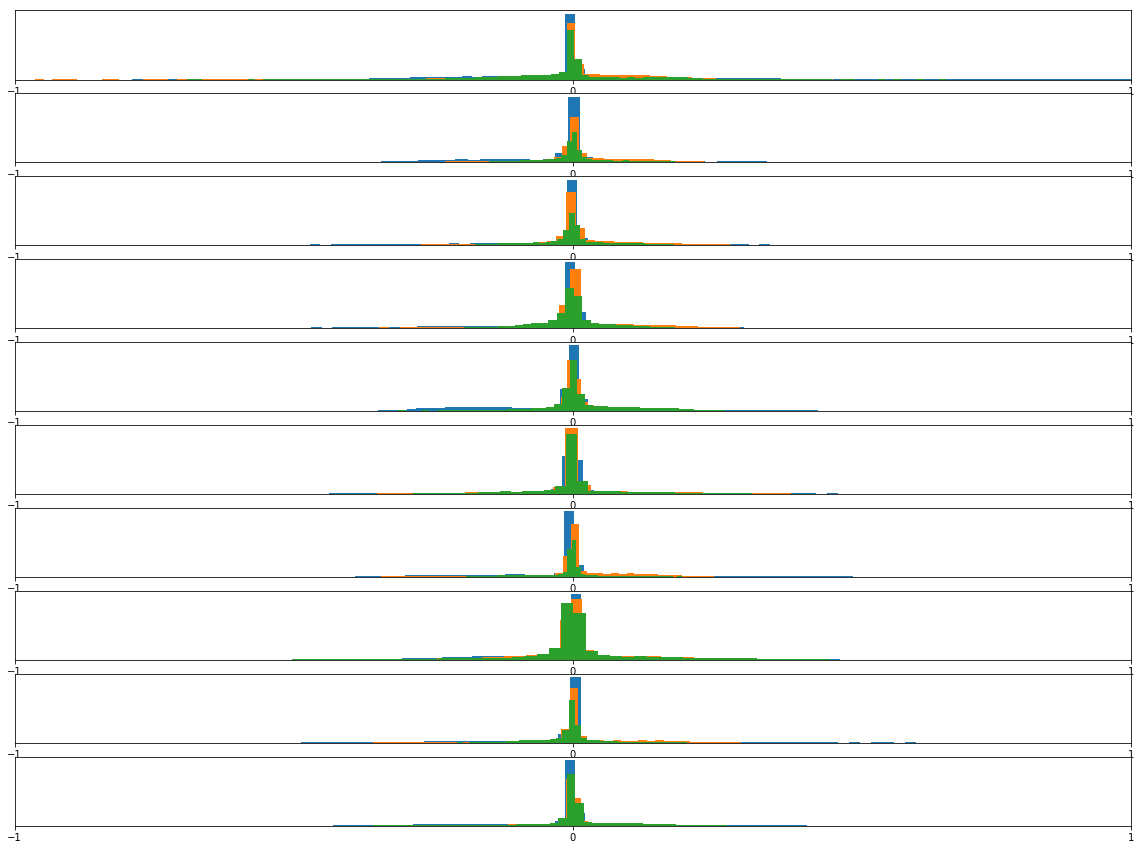

In [26]:
# plot body acceleration histograms for subjects 
plot_subject_histograms(X, y, sub_map, 3)

The second figure shows histograms for the body acceleration with very different results. We can see all data clustered around 0.0 across axis within a subject and across subjects. This suggests that perhaps the data was centered (zero mean). This strong consistency across subjects may aid in modeling, and may suggest that __the differences across subjects in the total acceleration data may not be as helpful.__

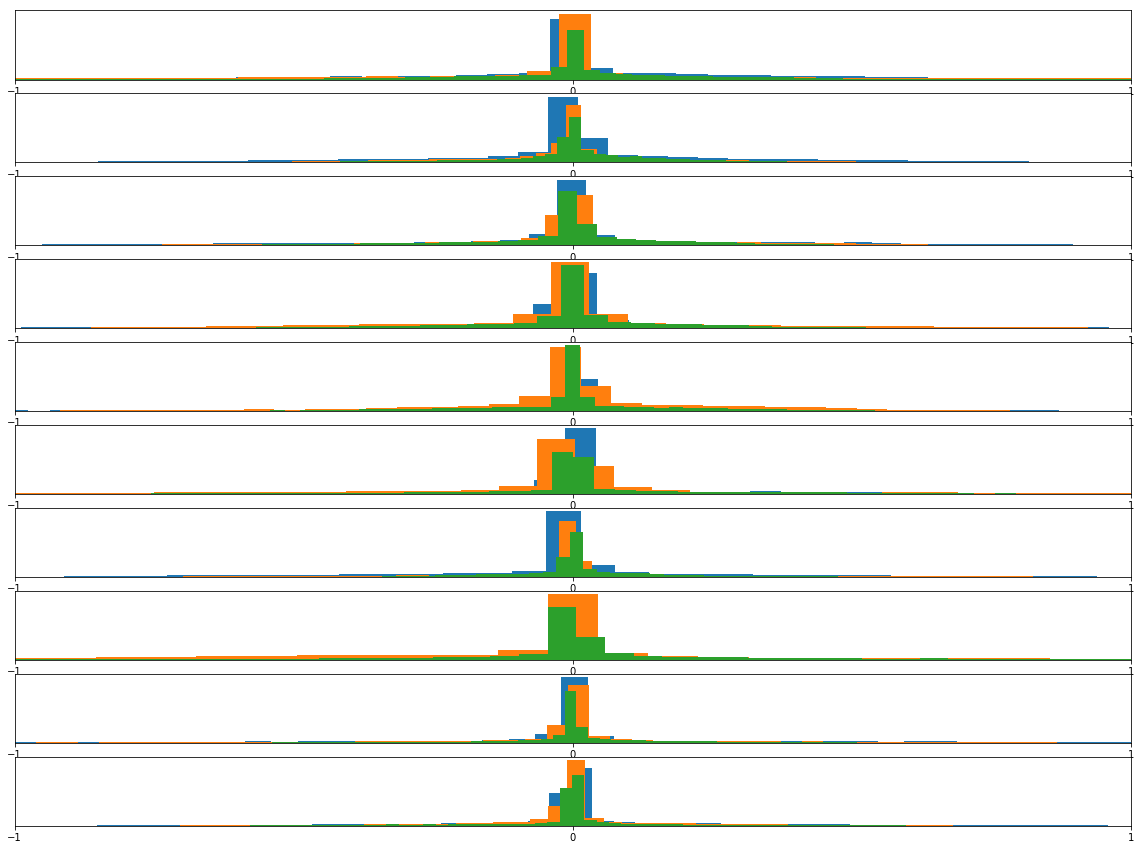

In [27]:
# plot gyroscopic histograms for subjects 
plot_subject_histograms(X, y, sub_map, 6)

We see a high likelihood of a Gaussian distribution for each axis across each subject centered on 0.0. The distributions are a little wider and show fatter tails, but this is an encouraging finding for modeling movement data across subjects.

## 22.8 Plot Distribution Per Activity

The simplest case for this would be to discriminate between activities for a single subject. One way to investigate this would be to review the distribution of movement data for a subject by activity.

First, we must group the traces for a subject by activity. The data by activity() function below implements this behavior.

The plot activity histograms() function below implements this function for the traces data for a given subject. First, the data is grouped by activity, then one subplot is created for each activity and each axis of the data type is added as a histogram.

As in the previous section, the addition of an offset argument allows the same function to be called for each of the 3 groups of variables to plot at a time: total acceleration, body acceleration and gyroscopic with offsets 0, 3 and 6 respectively.

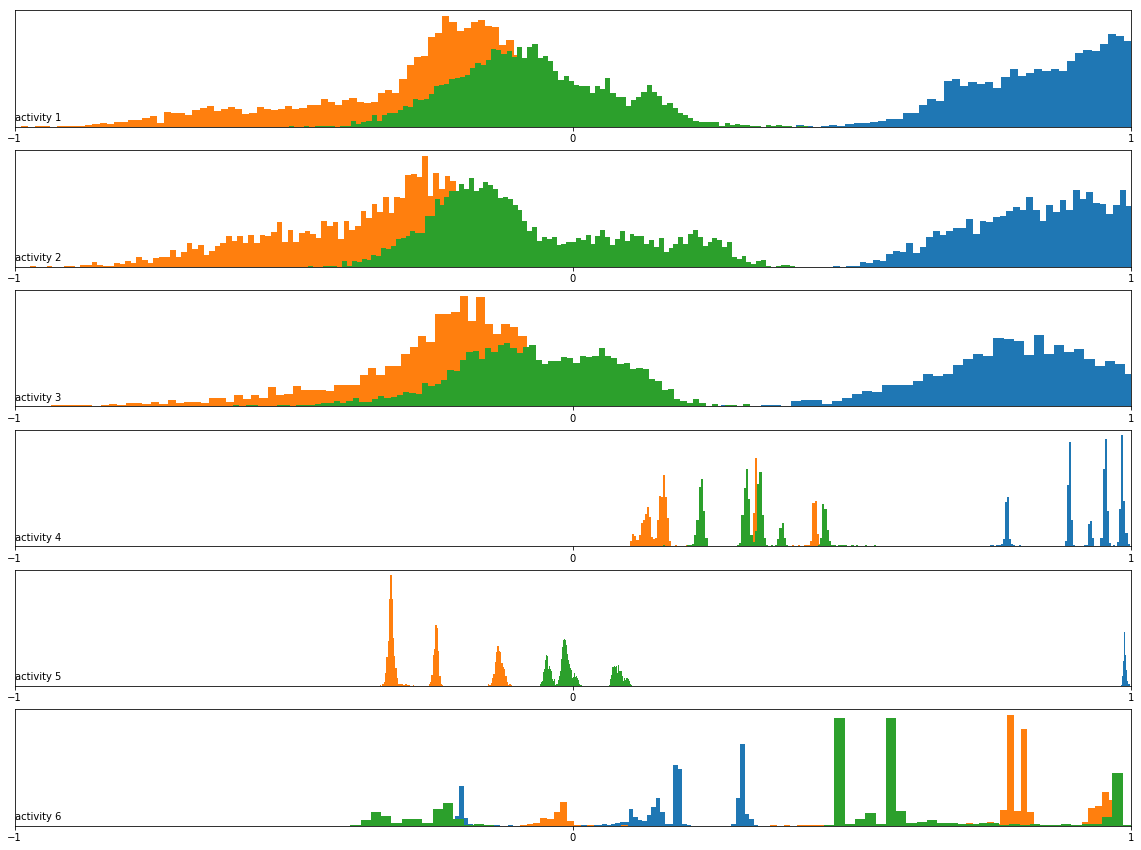

In [29]:
# plot histograms per activity for a subject from the har dataset
from numpy import dstack
from numpy import unique
from pandas import read_csv
from matplotlib import pyplot

# load a single file as a numpy array
def load_file(filepath):
	dataframe = read_csv(filepath, header=None, delim_whitespace=True)
	return dataframe.values

# load a list of files, such as x, y, z data for a given variable
def load_group(filenames, prefix=''):
	loaded = list()
	for name in filenames:
		data = load_file(prefix + name)
		loaded.append(data)
	# stack group so that features are the 3rd dimension
	loaded = dstack(loaded)
	return loaded

# load a dataset group, such as train or test
def load_dataset(group, prefix=''):
	filepath = prefix + group + '/Inertial Signals/'
	# load all 9 files as a single array
	filenames = list()
	# total acceleration
	filenames += ['total_acc_x_'+group+'.txt', 'total_acc_y_'+group+'.txt', 'total_acc_z_'+group+'.txt']
	# body acceleration
	filenames += ['body_acc_x_'+group+'.txt', 'body_acc_y_'+group+'.txt', 'body_acc_z_'+group+'.txt']
	# body gyroscope
	filenames += ['body_gyro_x_'+group+'.txt', 'body_gyro_y_'+group+'.txt', 'body_gyro_z_'+group+'.txt']
	# load input data
	X = load_group(filenames, filepath)
	# load class output
	y = load_file(prefix + group + '/y_'+group+'.txt')
	return X, y

# get all data for one subject
def data_for_subject(X, y, sub_map, sub_id):
	# get row indexes for the subject id
	ix = [i for i in range(len(sub_map)) if sub_map[i]==sub_id]
	# return the selected samples
	return X[ix, :, :], y[ix]

# convert a series of windows to a 1D list
def to_series(windows):
	series = list()
	for window in windows:
		# remove the overlap from the window
		half = int(len(window) / 2) - 1
		for value in window[-half:]:
			series.append(value)
	return series

# group data by activity
def data_by_activity(X, y, activities):
	# group windows by activity
	return {a:X[y[:,0]==a, :, :] for a in activities}

# plot histograms for each activity for a subject
def plot_activity_histograms(X, y, offset):
	# get a list of unique activities for the subject
	activity_ids = unique(y[:,0])
	# group windows by activity
	grouped = data_by_activity(X, y, activity_ids)
	# plot per activity, histograms for each axis
	pyplot.figure()
	for k in range(len(activity_ids)):
		act_id = activity_ids[k]
		# total acceleration
		for i in range(3):
			ax = pyplot.subplot(len(activity_ids), 1, k+1)
			ax.set_xlim(-1,1)
			# create histogra,
			pyplot.hist(to_series(grouped[act_id][:,:,offset+i]), bins=100)
			# create title
			pyplot.title('activity '+str(act_id), y=0, loc='left', size=10)
			# simplify axis
			pyplot.yticks([])
			pyplot.xticks([-1,0,1])
	pyplot.show()

# load data
trainX, trainy = load_dataset('train', 'HARDataset/')
# load mapping of rows to subjects
sub_map = load_file('HARDataset/train/subject_train.txt')
train_subjects = unique(sub_map)
# get the data for one subject
sub_id = train_subjects[0]
subX, suby = data_for_subject(trainX, trainy, sub_map, sub_id)
# plot total acceleration histograms per activity for a subject
plot_activity_histograms(subX, suby, 0)



Running the example creates three figures, where each figure has with six subplots, one for each activity for the first subject in the train dataset. Each of the x, y, and z axes for the total acceleration data have a blue, orange, and green histogram respectively. In the first figure, can see that each activity has a different data distribution, with a marked difference between the large movement (first three activities) with the stationary activities (last three activities). __Data distributions for the first three activities look Gaussian with perhaps differing means and standard deviations. Distributions for the latter activities look multi-modal (i.e. multiple peaks).__

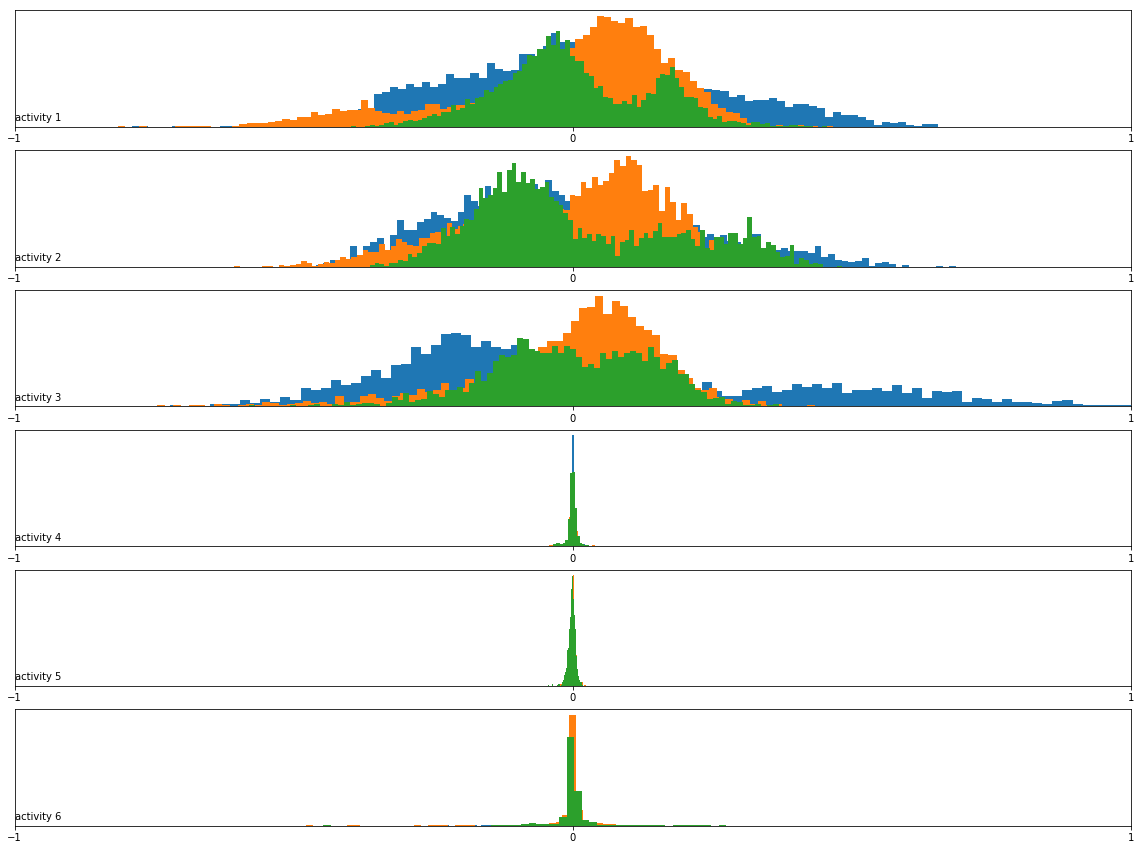

In [30]:
# plot body acceleration histograms per activity for a subject
plot_activity_histograms(subX, suby, 3)

The second figure summarizes the body acceleration distributions per activity. __We can see more similar distributions across the activities amongst the in-motion vs. stationary activities.__ The data looks bimodal in the case of the in-motion activities and perhaps Gaussian or exponential in the case of the stationary activities. The pattern we see with the total vs. body acceleration distributions by activity mirrors what we see with the same data types across subjects in the previous section. __Perhaps the total acceleration data is the key to discriminating the activities.__

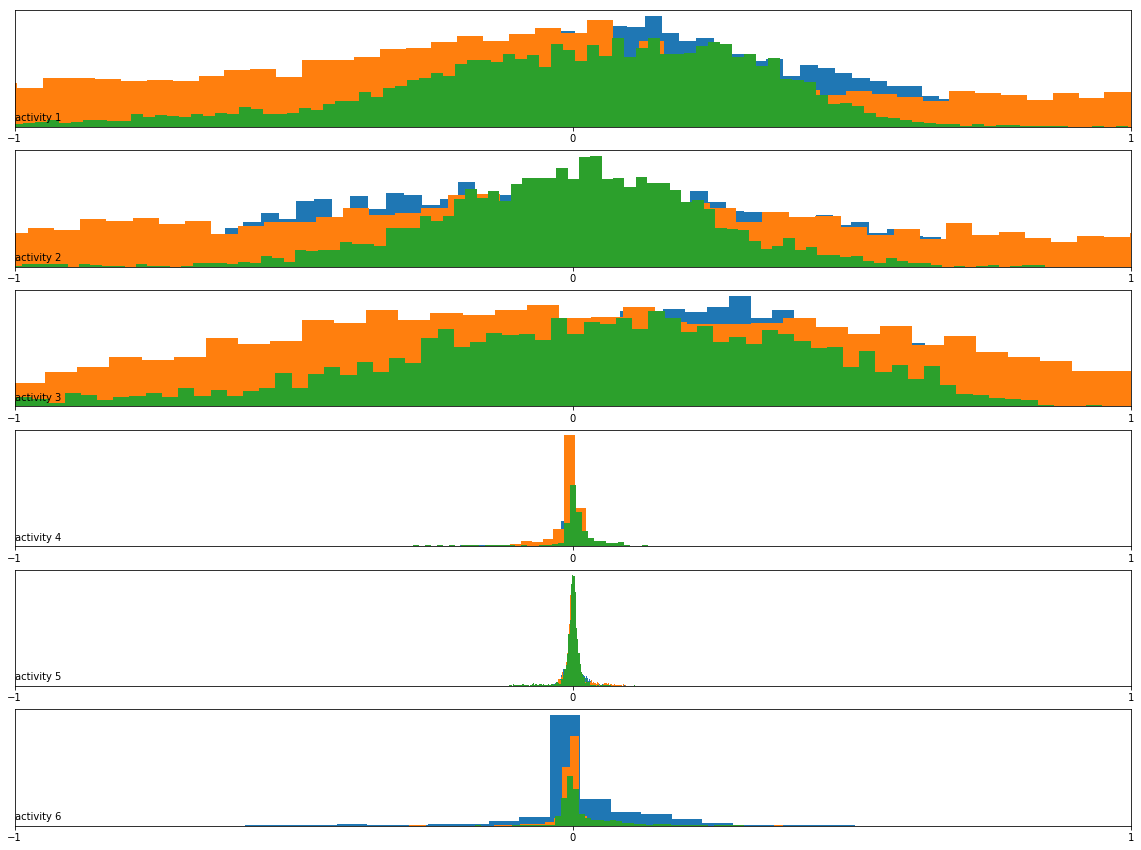

In [31]:
# plot gyroscopic histograms per activity for a subject
plot_activity_histograms(subX, suby, 6)

The final figure summarizes the gyroscopic data per activity for the first subject. We can see plots with the similar pattern as the body acceleration data, although showing perhaps fat-tailed Gaussian-like distributions instead of bimodal distributions for the in-motion activities.

## 22.9 Plot Distribution of Activity Duration


A final area to consider is how long a subject spends on each activity.  If the activities (classes) are generally balanced within a dataset, then we expect the balance of activities for a given subject over the course of their trace would also be reasonably well balanced. We can confirm this by calculating how long (in samples or rows) each subject spends on each activity and look at the distribution of durations for each activity.

A handy way to review this data is to summarize the distributions as box plots showing the median (line), the middle 50% (box), the general extent of the data as the interquartile range (the whiskers), and outliers (as dots). The function plot activity durations by subject() below implements this behavior by first splitting the dataset by subject, then the subjects data by activity and counting the rows spent on each activity, before finally creating a box plot per activity of the duration measurements.

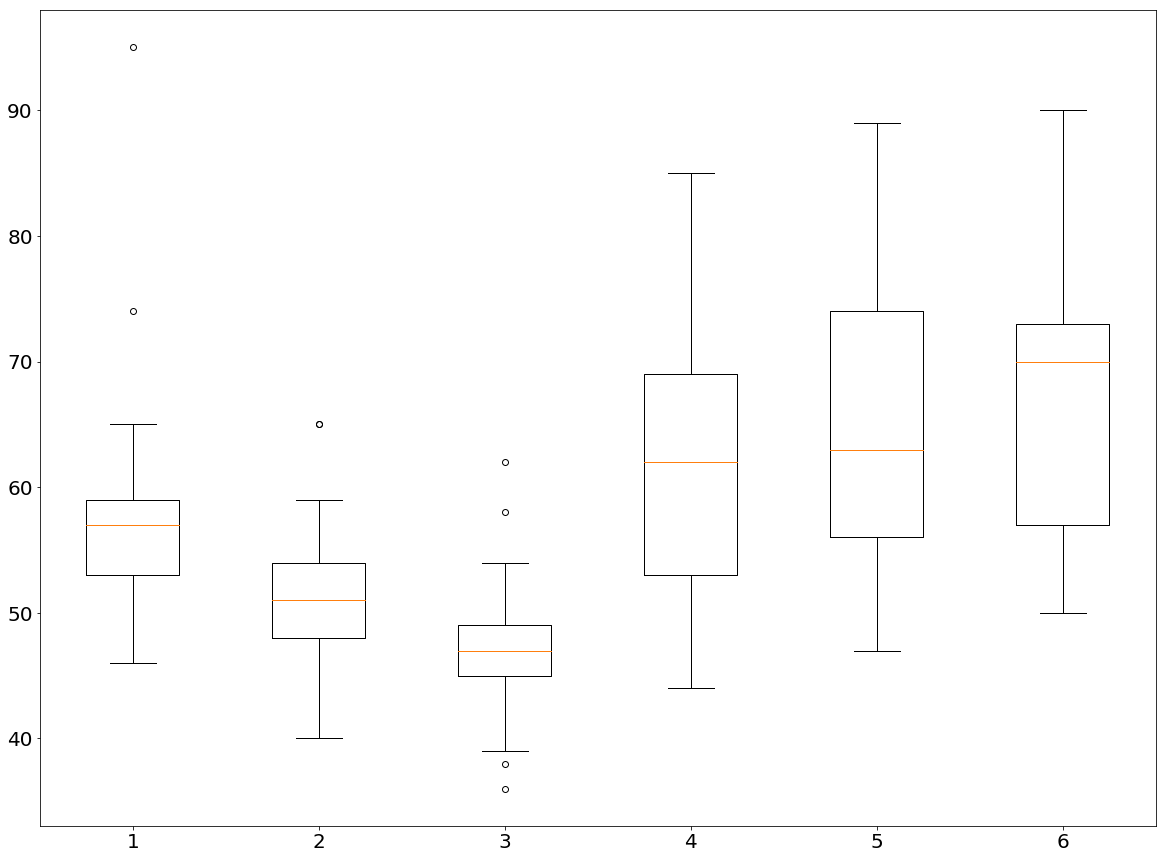

In [35]:
# plot durations of each activity by subject from the har dataset
from numpy import dstack
from numpy import unique
from pandas import read_csv
from matplotlib import pyplot

# load a single file as a numpy array
def load_file(filepath):
	dataframe = read_csv(filepath, header=None, delim_whitespace=True)
	return dataframe.values

# load a list of files, such as x, y, z data for a given variable
def load_group(filenames, prefix=''):
	loaded = list()
	for name in filenames:
		data = load_file(prefix + name)
		loaded.append(data)
	# stack group so that features are the 3rd dimension
	loaded = dstack(loaded)
	return loaded

# load a dataset group, such as train or test
def load_dataset(group, prefix=''):
	filepath = prefix + group + '/Inertial Signals/'
	# load all 9 files as a single array
	filenames = list()
	# total acceleration
	filenames += ['total_acc_x_'+group+'.txt', 'total_acc_y_'+group+'.txt', 'total_acc_z_'+group+'.txt']
	# body acceleration
	filenames += ['body_acc_x_'+group+'.txt', 'body_acc_y_'+group+'.txt', 'body_acc_z_'+group+'.txt']
	# body gyroscope
	filenames += ['body_gyro_x_'+group+'.txt', 'body_gyro_y_'+group+'.txt', 'body_gyro_z_'+group+'.txt']
	# load input data
	X = load_group(filenames, filepath)
	# load class output
	y = load_file(prefix + group + '/y_'+group+'.txt')
	return X, y

# get all data for one subject
def data_for_subject(X, y, sub_map, sub_id):
	# get row indexes for the subject id
	ix = [i for i in range(len(sub_map)) if sub_map[i]==sub_id]
	# return the selected samples
	return X[ix, :, :], y[ix]

# convert a series of windows to a 1D list
def to_series(windows):
	series = list()
	for window in windows:
		# remove the overlap from the window
		half = int(len(window) / 2) - 1
		for value in window[-half:]:
			series.append(value)
	return series

# group data by activity
def data_by_activity(X, y, activities):
	# group windows by activity
	return {a:X[y[:,0]==a, :, :] for a in activities}

# plot activity durations by subject
def plot_activity_durations_by_subject(X, y, sub_map):
    # get unique subjects and activities
    subject_ids = unique(sub_map[:,0])
    activity_ids = unique(y[:,0])
    # enumerate subjects
    activity_windows = {a:list() for a in activity_ids}
    for sub_id in subject_ids:
        # get data for one subject
        _, subj_y = data_for_subject(X, y, sub_map, sub_id)
        # count windows by activity
        for a in activity_ids:
            activity_windows[a].append(len(subj_y[subj_y[:,0]==a]))
    # organize durations into a list of lists
    durations = [activity_windows[a] for a in activity_ids]
    pyplot.boxplot(durations, labels=activity_ids)
    pyplot.xticks(fontsize=20)
    pyplot.yticks(fontsize=20)
    pyplot.show()

# load training dataset
X, y = load_dataset('train', 'HARDataset/')
# load mapping of rows to subjects
sub_map = load_file('HARDataset/train/subject_train.txt')
# plot durations
plot_activity_durations_by_subject(X, y, sub_map)

Running the example creates six box plots, one for each activity. Each box plot summarizes how long (in rows or the number of windows) subjects in the training dataset spent on each activity. We can see that the subjects spent more time on stationary activities (4, 5 and 6) and less time on the in motion activities (1, 2 and 3), with the distribution for 3 being the smallest or where time was spent least. The spread across the activities is not large, suggesting little need to trim the longer duration activities or oversampling of the in-motion activities. Although, these approaches remain available if skill of a predictive model on the in-motion activities is generally worse.

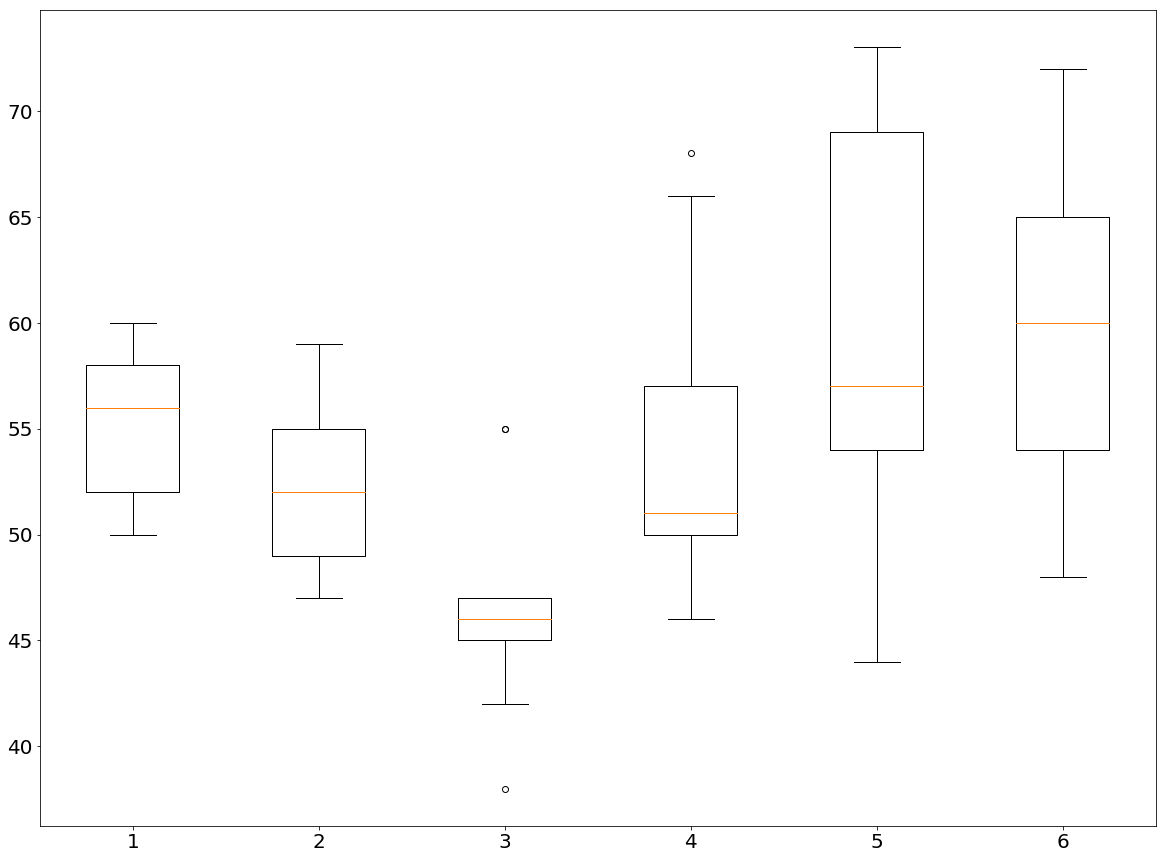

In [36]:
# load test dataset
X, y = load_dataset('test', 'HARDataset/')
# load mapping of rows to subjects
sub_map = load_file('HARDataset/test/subject_test.txt') # plot durations
plot_activity_durations_by_subject(X, y, sub_map)

Running the updated example shows a similar relationship between activities. This is encouraging, suggesting that indeed the test and training dataset are reasonably representative of the whole dataset.

## 22.10 Approach to Modeling
### 22.10.1 Problem Framing

- Predict activity given a window of movement data.

This is a reasonable and useful framing of the problem. Some other possible ways to frame the provided data as a prediction problem include the following:

- Predict activity given a time step of movement data.
- Predict activity given multiple windows of movement data.
- Predict the activity sequence given multiple windows of movement data.
- Predict activity given a sequence of movement data for a pre-segmented activity.
- Predict activity cessation or transition given a time step of movement data.
- Predict a stationary or non-stationary activity given a window of movement data.

### 22.10.2 Data Preparation
Some data preparation may be required prior to using the raw data to train a model. The data already appears to have been scaled to the range [-1,1]. Some additional data transforms that could be performed prior to modeling include:

- Normalization across subjects. 􏰀 Standardization per subject.
- Standardization across subjects. 􏰀 Axis feature selection.
- Data type feature selection.
- Signal outlier detection and removal.
- Removing windows of over-represented activities.
- Oversampling windows of under-represented activities.
- Downsampling signal data to $\frac{1}{4}$ , $\frac{1}{2}$ , 1, 2 or other fractions of a section. 

### 22.10.3 Predictive Modeling

The original paper explored the use of a classical machine learning algorithm on a version of the dataset where features were engineered from each window of data. Specifically, a modified support vector machine.

Expanding from this point, the evaluation of multiple linear, nonlinear, and ensemble machine learning algorithms on this version of the dataset may provide an improved benchmark. The focus of the problem may be on the un-engineered or raw version of the dataset.

- Common linear, nonlinear, and ensemble machine learning algorithms. 􏰀 
- Multilayer Perceptron.
- Convolutional neural networks, specifically 1D CNNs.
- Recurrent neural networks, specifically LSTMs.
- Hybrids of CNNs and LSTMs such as the CNN-LSTM and the ConvLSTM.

## 22.11 Model Evaluation

The evaluation of the model in the original paper involved using a train/test split of the data by subject with a 70% and 30% ratio. 

Another alternative methodology may be to use leave-one-out cross-validation, or LOOCV, per subject. In addition to giving the data for each subject the opportunity for being used as the withheld test set, the approach would provide a population of 30 scores that can be averaged and summarized, which may offer a more robust result.

Model performance was presented using classification accuracy and a confusion matrix, both of which are suitable for the multiclass nature of the prediction problem.

## 22.13 Further Reading
This section provides more resources on the topic if you are looking to go deeper.

### 22.13.1 Papers
- Deep Learning for Sensor-based Activity Recognition: A Survey, 2017. https://arxiv.org/abs/1707.03502
- A Public Domain Dataset for Human Activity Recognition Using Smartphones, 2013. https://upcommons.upc.edu/handle/2117/20897
- Human Activity Recognition on Smartphones using a Multiclass Hardware-Friendly Support Vector Machine, 2012.
https://link.springer.com/chapter/10.1007/978-3-642-35395-6_30


### 22.13.2 API
- pandas.read csv API. http://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html
- numpy.dstack API. https://www.numpy.org/devdocs/reference/generated/numpy.dstack.html

### 22.13.3 Articles
- Human Activity Recognition Dataset, UCI Machine Learning Repository. https://archive.ics.uci.edu/ml/datasets/human+activity+recognition+using+smartphones
- Activity recognition, Wikipedia. https://en.wikipedia.org/wiki/Activity_recognition
- Activity Recognition Experiment Using Smartphone Sensors, YouTube. https://www.youtube.com/watch?v=XOEN9W05_4A


## 22.14 Summary
In this tutorial, you discovered the Activity Recognition Using Smartphones Dataset for time series classification and how to load and explore the dataset in order to make it ready for predictive modeling. Specifically, you learned:
- How to download and load the dataset into memory.
- How to use line plots, histograms, and box plots to better understand the structure of the motion data.
- How to model the problem including framing, data preparation, modeling, and evaluation.